In [2]:
import pandas as pd
import numpy as np

In [18]:
#LOAD THE DATA

data = pd.read_csv('train.csv')

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
data.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [21]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [22]:
#DATA PREPROCESSING

data['Age'].fillna(data['Age'].median(), inplace=True)
data.drop(columns=['Cabin'], inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

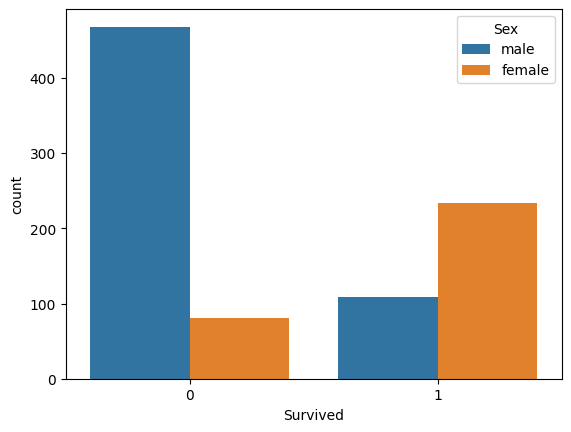

In [24]:
#EXPLORATORY DATA ANALYSIS(EDA)

sns.countplot(x='Survived', hue='Sex', data=data)
plt.show()

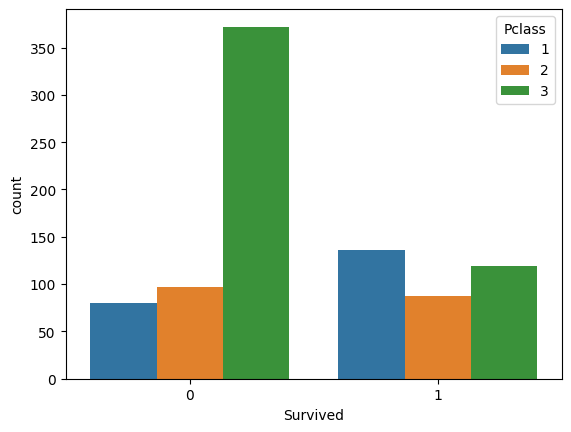

In [25]:
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.show()

In [26]:
#FEATURE ENGINEERING

data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [27]:
X = data.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y = data['Survived']

In [28]:
#MODEL TRAINING

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred = model.predict(X_test)

In [32]:
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179

Accuracy: 0.8156424581005587


In [35]:
#HYPERPARAMETER TUNING:
    # Hyperparameter tuning involves searching for the best parameters for your model 
    # to improve its performance. The parameters that we tune are those not learned 
    # from the data but set before the training process. For Random Forest, these 
    # can include the number of trees (n_estimators), the maximum depth of each 
    # tree (max_depth), and others.

from sklearn.model_selection import GridSearchCV

    #define parameter grid
    
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'max_depth': [4, 6, 8, 10],  # Maximum depth of the tree
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

    #perform grid search

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

    #best parameters
    
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

    # Train the model with best parameters
    
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
43 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils

Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}


In [37]:
#MODEL EVALUATION ON TEST DATA
    #Once you have the best model from the hyperparameter tuning step, you evaluate it on the test data to see how well it performs.

    #make predictions with the best model

best_y_pred = best_model.predict(X_test)

    #evaluate the model
    
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, best_y_pred))
print(f'Accuracy: {accuracy_score(y_test, best_y_pred)}')

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Accuracy: 0.8212290502793296


In [39]:
#CROSS VALIDATION
    #Cross-validation is a technique to evaluate the model’s performance more robustly by splitting the data into multiple folds. 
    #The model is trained and validated on different sets to ensure it generalizes well.

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_model, X, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Score: {cv_scores.mean()}')

Cross-Validation Scores: [0.75977654 0.81460674 0.83707865 0.79213483 0.83707865]
Average Cross-Validation Score: 0.8081350825434688


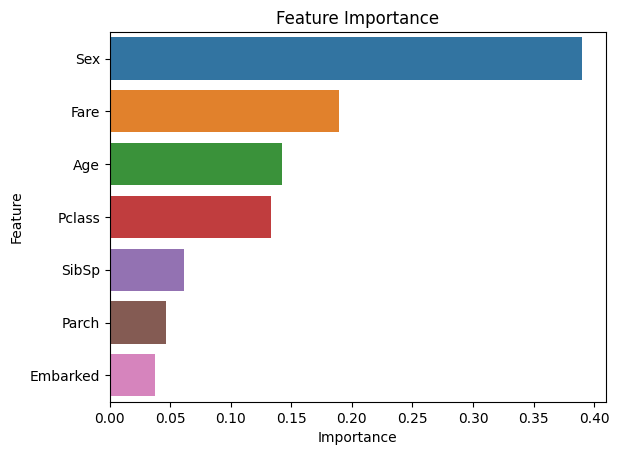

In [40]:
#FEATURE IMPORTANCE
    #Analyzing feature importance helps you understand which features 
    #are the most influential in predicting the target variable.

importances = best_model.feature_importances_
feature_names = X.columns

    # Create a DataFrame for visualization

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importance
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [41]:
#SAVE THE MODEL

import joblib

    # Save the model to a file
joblib.dump(best_model, 'titanic_model.pkl')

['titanic_model.pkl']

In [42]:
#LOAD THE MODEL(FOR FUTURE)

    # Load the model from the file
loaded_model = joblib.load('titanic_model.pkl')

    # Use the loaded model to make predictions
loaded_model.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)